The 2 cells underneath this are my attempts to replicate state space orbits. All subsequent code is a mix of mine and Mehdis. Mehdi's code solves the ODE and displays the State-Space Orbit, I implemented 2d/3d functionality.

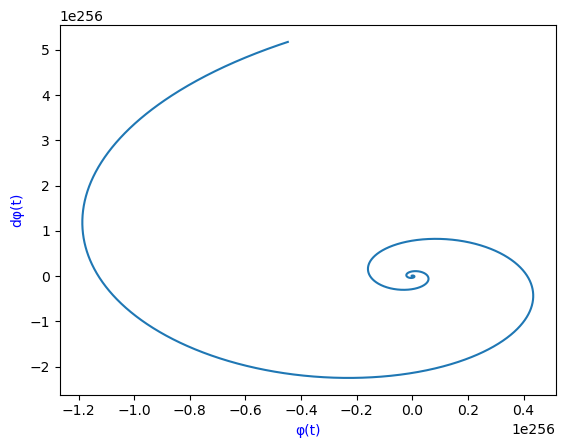

In [130]:
# Various Importing Statements
from matplotlib.pyplot import plot, show, xlabel, ylabel, xlim, ylim
from numpy import sin, cos, arange, linspace, exp
from numpy import log as ln
from numpy import log10 as log



t0 = 0
tf = 590
dt = 0.001
t = arange(t0,tf + dt,dt)

b = 0.01 
m = 5.0 #Mass of the pendulum
L = 1.0 #Length of the pendulum
g = 9.8 #Gravity
w = sqrt(g/L) #Natural Frequency
B =(b/(2*m)) #ODE techniques ig
y = 4.5*t # Drive Strength
A = exp(t)
d = (-(4*pi)/7)


#Defining Functions
def φ(t):
    return(A*cos(w*t + d))

def dφ(t):
    return(-A*w*sin(w*t + d))

#Plotting 
plot(φ(t), dφ(t))
xlabel('φ(t)', c = 'b')
ylabel ('dφ(t)', c = 'b')
show()

C:\Users\KhanJ\AppData\Local\Temp\ipykernel_49824\1540623425.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


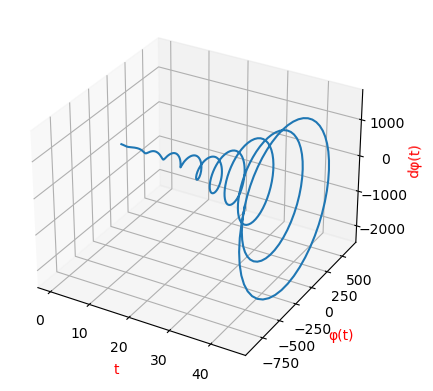

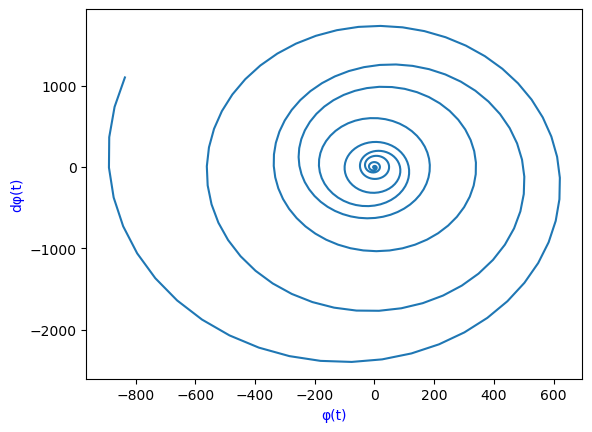

In [158]:
#Importing and set up
from matplotlib.pyplot import figure, plot, show, xlabel, ylabel
from numpy import array, arange, linspace, sqrt, meshgrid, reshape, empty, sin, cos, pi, exp
from numpy import log10 as log
from numpy import log as ln
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')

#Defining the time scale here
t0 = 0.0
tf = 45.0
dt = 0.1
t = arange(t0,tf + dt,dt)    
    

#Defining the variables and the equation of motion
b = 0.01 
m = 5.0 #Mass of the pendulum
L = 1.0 #Length of the pendulum
g = 9.8 #Gravity
w = sqrt(g/L) #Natural Frequency
B =(b/(2*m)) #ODE techniques ig
y = 4.5 # Drive Strength

A = exp(sqrt(cos(t) + sin(t) + t))
d = (-(4*pi*t)/7)

def φ(t):
    return(A*cos(w*t + d))

def dφ(t):
    return(-A*w*sin(w*t + d))

def ddφ(t):
    return(A*(w**2)*cos(w*t + d))

def f(t):
    return(ddφ(t) + 2*B*dφ(t) + (w**2)*φ(t) - y*(w**2)*cos(w*t)) 

plot(t, φ(t), dφ(t))
ax.set_xlabel("t", c = "r")
ax.set_ylabel("φ(t)", c = "r")
ax.set_zlabel("dφ(t)", c = "r")
show()

plot(φ(t), dφ(t))
xlabel('φ(t)', c = 'b')
ylabel ('dφ(t)', c = 'b')
show()

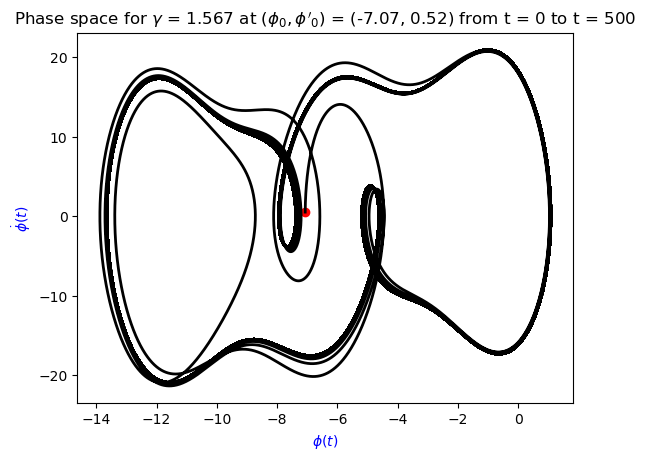

In [290]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si
from matplotlib.pyplot import figure, plot, show, xlabel, ylabel, scatter, title
from numpy import array, arange, linspace, sqrt, meshgrid, reshape, empty, sin, cos, pi, exp
from numpy import log10 as log
from numpy import log as ln
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

t0, tf = 0, 500 #initial and final times
dt = 0.0001 #times step for the times array
times = np.arange(t0, tf+dt, dt)

#Other parameters
om = 2*pi
om_0 = 1.5*om
b = om_0/4

#Value of gamma. A parameter that influences how chaotic the system is
g = 1.567

#Initial conditions for y
ic = np.array([-(9*pi/4), ((pi/6))])

#Rewriting the ODE as a system of linear equations
def flux_ode(t, y, om, om_0, b, g):
    return np.array(
        [
            y[1], 
            g*(om_0**2)*np.cos(om*t) - 2*b*y[1] - (om_0**2)*np.sin(y[0])
            ]
        )

method = 'DOP853'

#Solves the DE at the desired initial condition
y1 = si.solve_ivp(
    flux_ode,
    [t0, tf], ic, t_eval=times, 
    args=[om, om_0, b, g],
    method=method, 
    vectorized=True, 
    rtol=1e-10,
    atol=1e-10
    ).y


def plot3d():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    plot(y1[1], y1[0], times, lw=2, c="k")
    ax.scatter(np.array(ic[0]), np.array(ic[1]), c="r")
    ax.set_title(f"Phase space for $\gamma$ = {g} at $(\phi_0, \phi'_0)$ = {(round(ic[0],2), round(ic[1],2))} from t = {round(t0,2)} to t = {round(tf,2)}")
    ax.grid()
    ax.set_zlabel("t", c = 'b')
    ax.set_ylabel("$\phi(t)$", c = 'b')
    ax.set_xlabel("$\dot{\phi}(t)$", c = 'b')
    return(show())

def plot2d():
    plot(y1[0], y1[1], lw=2, c="k")
    scatter(np.array(ic[0]), np.array(ic[1]), c="r")
    title(f"Phase space for $\gamma$ = {g} at $(\phi_0, \phi'_0)$ = {(round(ic[0],2), round(ic[1],2))} from t = {round(t0,2)} to t = {round(tf,2)}")
    xlabel("$\phi(t)$", c = 'b')
    ylabel("$\dot{\phi}(t)$", c = 'b')
    return(show())
    
    
#Plot the phase space diagram for the solution

plot2d()

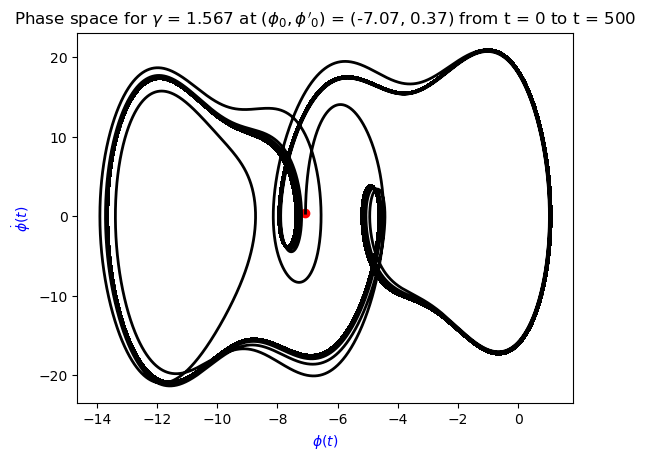

In [293]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si
from matplotlib.pyplot import figure, plot, show, xlabel, ylabel, scatter, title
from numpy import array, arange, linspace, sqrt, meshgrid, reshape, empty, sin, cos, pi, exp
from numpy import log10 as log
from numpy import log as ln
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

t0, tf = 0, 500 #initial and final times
dt = 0.0001 #times step for the times array
times = np.arange(t0, tf+dt, dt)

#Other parameters
om = 2*pi
om_0 = 1.5*om
b = om_0/4

#Value of gamma. A parameter that influences how chaotic the system is
g = 1.567

#Initial conditions for y
ic = np.array([-(9*pi/4), ((pi/6)) - .15])

#Rewriting the ODE as a system of linear equations
def flux_ode(t, y, om, om_0, b, g):
    return np.array(
        [
            y[1], 
            g*(om_0**2)*np.cos(om*t) - 2*b*y[1] - (om_0**2)*np.sin(y[0])
            ]
        )

method = 'DOP853'

#Solves the DE at the desired initial condition
y1 = si.solve_ivp(
    flux_ode,
    [t0, tf], ic, t_eval=times, 
    args=[om, om_0, b, g],
    method=method, 
    vectorized=True, 
    rtol=1e-10,
    atol=1e-10
    ).y


def plot3d():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    plot(y1[1], y1[0], times, lw=2, c="k")
    ax.scatter(np.array(ic[0]), np.array(ic[1]), c="r")
    ax.set_title(f"Phase space for $\gamma$ = {g} at $(\phi_0, \phi'_0)$ = {(round(ic[0],2), round(ic[1],2))} from t = {round(t0,2)} to t = {round(tf,2)}")
    ax.grid()
    ax.set_zlabel("t", c = 'b')
    ax.set_ylabel("$\phi(t)$", c = 'b')
    ax.set_xlabel("$\dot{\phi}(t)$", c = 'b')
    return(show())

def plot2d():
    plot(y1[0], y1[1], lw=2, c="k")
    scatter(np.array(ic[0]), np.array(ic[1]), c="r")
    title(f"Phase space for $\gamma$ = {g} at $(\phi_0, \phi'_0)$ = {(round(ic[0],2), round(ic[1],2))} from t = {round(t0,2)} to t = {round(tf,2)}")
    xlabel("$\phi(t)$", c = 'b')
    ylabel("$\dot{\phi}(t)$", c = 'b')
    return(show())
    
    
#Plot the phase space diagram for the solution

plot2d()

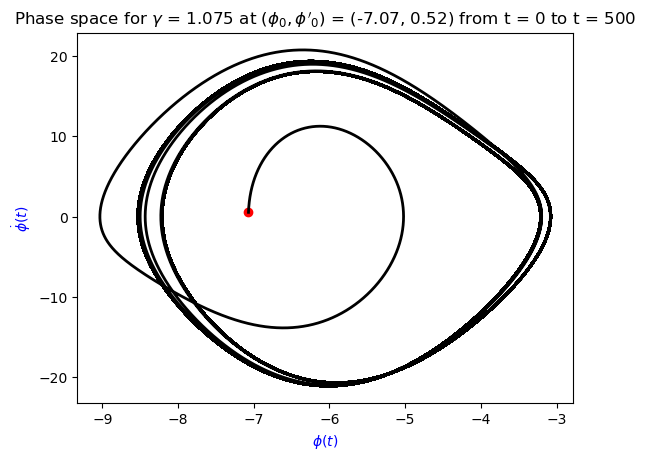

In [267]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si
from matplotlib.pyplot import figure, plot, show, xlabel, ylabel, scatter, title
from numpy import array, arange, linspace, sqrt, meshgrid, reshape, empty, sin, cos, pi, exp
from numpy import log10 as log
from numpy import log as ln
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

t0, tf = 0, 500 #initial and final times
dt = 0.0001 #times step for the times array
times = np.arange(t0, tf+dt, dt)

#Other parameters
om = 2*pi
om_0 = 1.5*om
b = om_0/4

#Value of gamma. A parameter that influences how chaotic the system is
g = 1.075

#Initial conditions for y
ic = np.array([-(9*pi/4), (pi/6)])

#Rewriting the ODE as a system of linear equations
def flux_ode(t, y, om, om_0, b, g):
    return np.array(
        [
            y[1], 
            g*(om_0**2)*np.cos(om*t) - 2*b*y[1] - (om_0**2)*np.sin(y[0])
            ]
        )

method = 'DOP853'

#Solves the DE at the desired initial condition
y1 = si.solve_ivp(
    flux_ode,
    [t0, tf], ic, t_eval=times, 
    args=[om, om_0, b, g],
    method=method, 
    vectorized=True, 
    rtol=1e-10,
    atol=1e-10
    ).y


def plot3d():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    plot(y1[1], y1[0], times, lw=2, c="k")
    ax.scatter(np.array(ic[0]), np.array(ic[1]), c="r")
    ax.set_title(f"Phase space for $\gamma$ = {g} at $(\phi_0, \phi'_0)$ = {(round(ic[0],2), round(ic[1],2))} from t = {round(t0,2)} to t = {round(tf,2)}")
    ax.grid()
    ax.set_zlabel("t", c = 'b')
    ax.set_ylabel("$\phi(t)$", c = 'b')
    ax.set_xlabel("$\dot{\phi}(t)$", c = 'b')
    return(show())

def plot2d():
    plot(y1[0], y1[1], lw=2, c="k")
    scatter(np.array(ic[0]), np.array(ic[1]), c="r")
    title(f"Phase space for $\gamma$ = {g} at $(\phi_0, \phi'_0)$ = {(round(ic[0],2), round(ic[1],2))} from t = {round(t0,2)} to t = {round(tf,2)}")
    xlabel("$\phi(t)$", c = 'b')
    ylabel("$\dot{\phi}(t)$", c = 'b')
    return(show())
    
    
#Plot the phase space diagram for the solution

plot2d()

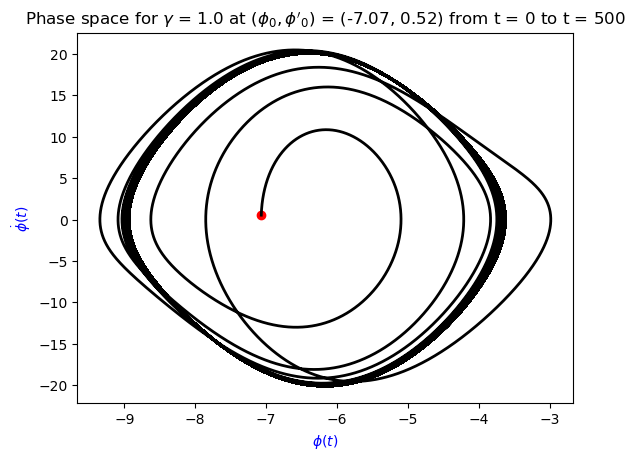

In [268]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si
from matplotlib.pyplot import figure, plot, show, xlabel, ylabel, scatter, title
from numpy import array, arange, linspace, sqrt, meshgrid, reshape, empty, sin, cos, pi, exp
from numpy import log10 as log
from numpy import log as ln
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

t0, tf = 0, 500 #initial and final times
dt = 0.0001 #times step for the times array
times = np.arange(t0, tf+dt, dt)

#Other parameters
om = 2*pi
om_0 = 1.5*om
b = om_0/4

#Value of gamma. A parameter that influences how chaotic the system is
g = 1.0

#Initial conditions for y
ic = np.array([-(9*pi/4), (pi/6)])

#Rewriting the ODE as a system of linear equations
def flux_ode(t, y, om, om_0, b, g):
    return np.array(
        [
            y[1], 
            g*(om_0**2)*np.cos(om*t) - 2*b*y[1] - (om_0**2)*np.sin(y[0])
            ]
        )

method = 'DOP853'

#Solves the DE at the desired initial condition
y1 = si.solve_ivp(
    flux_ode,
    [t0, tf], ic, t_eval=times, 
    args=[om, om_0, b, g],
    method=method, 
    vectorized=True, 
    rtol=1e-10,
    atol=1e-10
    ).y


def plot3d():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    plot(y1[1], y1[0], times, lw=2, c="k")
    ax.scatter(np.array(ic[0]), np.array(ic[1]), c="r")
    ax.set_title(f"Phase space for $\gamma$ = {g} at $(\phi_0, \phi'_0)$ = {(round(ic[0],2), round(ic[1],2))} from t = {round(t0,2)} to t = {round(tf,2)}")
    ax.grid()
    ax.set_zlabel("t", c = 'b')
    ax.set_ylabel("$\phi(t)$", c = 'b')
    ax.set_xlabel("$\dot{\phi}(t)$", c = 'b')
    return(show())

def plot2d():
    plot(y1[0], y1[1], lw=2, c="k")
    scatter(np.array(ic[0]), np.array(ic[1]), c="r")
    title(f"Phase space for $\gamma$ = {g} at $(\phi_0, \phi'_0)$ = {(round(ic[0],2), round(ic[1],2))} from t = {round(t0,2)} to t = {round(tf,2)}")
    xlabel("$\phi(t)$", c = 'b')
    ylabel("$\dot{\phi}(t)$", c = 'b')
    return(show())
    
    
#Plot the phase space diagram for the solution

plot2d()

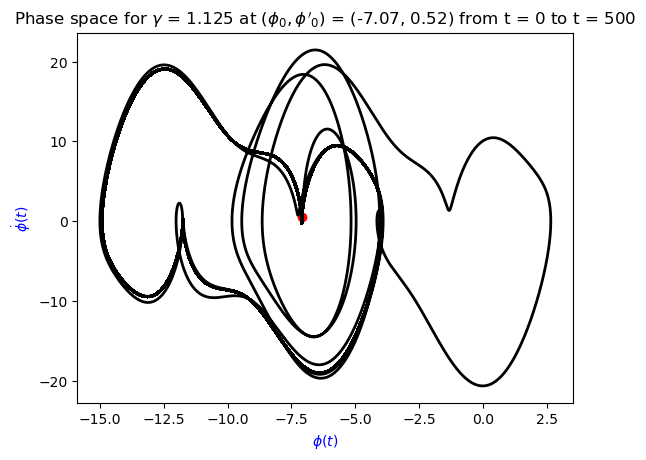

In [269]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si
from matplotlib.pyplot import figure, plot, show, xlabel, ylabel, scatter, title
from numpy import array, arange, linspace, sqrt, meshgrid, reshape, empty, sin, cos, pi, exp
from numpy import log10 as log
from numpy import log as ln
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

t0, tf = 0, 500 #initial and final times
dt = 0.0001 #times step for the times array
times = np.arange(t0, tf+dt, dt)

#Other parameters
om = 2*pi
om_0 = 1.5*om
b = om_0/4

#Value of gamma. A parameter that influences how chaotic the system is
g = 1.125

#Initial conditions for y
ic = np.array([-(9*pi/4), (pi/6)])

#Rewriting the ODE as a system of linear equations
def flux_ode(t, y, om, om_0, b, g):
    return np.array(
        [
            y[1], 
            g*(om_0**2)*np.cos(om*t) - 2*b*y[1] - (om_0**2)*np.sin(y[0])
            ]
        )

method = 'DOP853'

#Solves the DE at the desired initial condition
y1 = si.solve_ivp(
    flux_ode,
    [t0, tf], ic, t_eval=times, 
    args=[om, om_0, b, g],
    method=method, 
    vectorized=True, 
    rtol=1e-10,
    atol=1e-10
    ).y


def plot3d():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    plot(y1[1], y1[0], times, lw=2, c="k")
    ax.scatter(np.array(ic[0]), np.array(ic[1]), c="r")
    ax.set_title(f"Phase space for $\gamma$ = {g} at $(\phi_0, \phi'_0)$ = {(round(ic[0],2), round(ic[1],2))} from t = {round(t0,2)} to t = {round(tf,2)}")
    ax.grid()
    ax.set_zlabel("t", c = 'b')
    ax.set_ylabel("$\phi(t)$", c = 'b')
    ax.set_xlabel("$\dot{\phi}(t)$", c = 'b')
    return(show())

def plot2d():
    plot(y1[0], y1[1], lw=2, c="k")
    scatter(np.array(ic[0]), np.array(ic[1]), c="r")
    title(f"Phase space for $\gamma$ = {g} at $(\phi_0, \phi'_0)$ = {(round(ic[0],2), round(ic[1],2))} from t = {round(t0,2)} to t = {round(tf,2)}")
    xlabel("$\phi(t)$", c = 'b')
    ylabel("$\dot{\phi}(t)$", c = 'b')
    return(show())
    
    
#Plot the phase space diagram for the solution

plot2d()

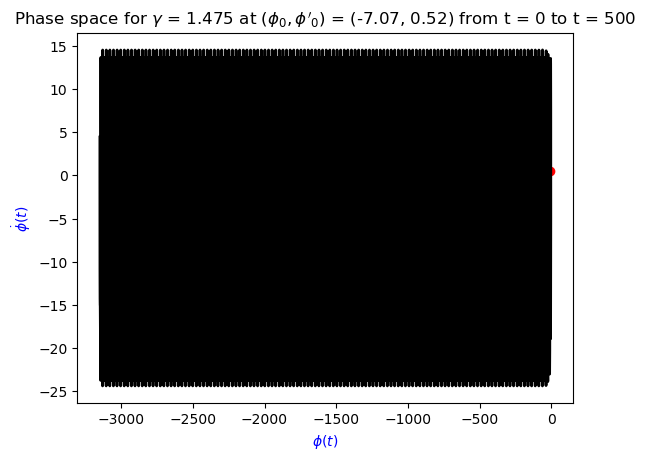

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si
from matplotlib.pyplot import figure, plot, show, xlabel, ylabel, scatter, title
from numpy import array, arange, linspace, sqrt, meshgrid, reshape, empty, sin, cos, pi, exp
from numpy import log10 as log
from numpy import log as ln
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

t0, tf = 0, 500 #initial and final times
dt = 0.0001 #times step for the times array
times = np.arange(t0, tf+dt, dt)

#Other parameters
om = 2*pi
om_0 = 1.5*om
b = om_0/4

#Value of gamma. A parameter that influences how chaotic the system is
g = 1.475

#Initial conditions for y
ic = np.array([-(9*pi/4), (pi/6)])

#Rewriting the ODE as a system of linear equations
def flux_ode(t, y, om, om_0, b, g):
    return np.array(
        [
            y[1], 
            g*(om_0**2)*np.cos(om*t) - 2*b*y[1] - (om_0**2)*np.sin(y[0])
            ]
        )

method = 'DOP853'

#Solves the DE at the desired initial condition
y1 = si.solve_ivp(
    flux_ode,
    [t0, tf], ic, t_eval=times, 
    args=[om, om_0, b, g],
    method=method, 
    vectorized=True, 
    rtol=1e-10,
    atol=1e-10
    ).y


def plot3d():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    plot(y1[1], y1[0], times, lw=2, c="k")
    ax.scatter(np.array(ic[0]), np.array(ic[1]), c="r")
    ax.set_title(f"Phase space for $\gamma$ = {g} at $(\phi_0, \phi'_0)$ = {(round(ic[0],2), round(ic[1],2))} from t = {round(t0,2)} to t = {round(tf,2)}")
    ax.grid()
    ax.set_zlabel("t", c = 'b')
    ax.set_ylabel("$\phi(t)$", c = 'b')
    ax.set_xlabel("$\dot{\phi}(t)$", c = 'b')
    return(show())

def plot2d():
    plot(y1[0], y1[1], lw=2, c="k")
    scatter(np.array(ic[0]), np.array(ic[1]), c="r")
    title(f"Phase space for $\gamma$ = {g} at $(\phi_0, \phi'_0)$ = {(round(ic[0],2), round(ic[1],2))} from t = {round(t0,2)} to t = {round(tf,2)}")
    xlabel("$\phi(t)$", c = 'b')
    ylabel("$\dot{\phi}(t)$", c = 'b')
    return(show())
    
    
#Plot the phase space diagram for the solution

plot2d()

C:\Users\KhanJ\AppData\Local\Temp\ipykernel_49824\2342005724.py:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


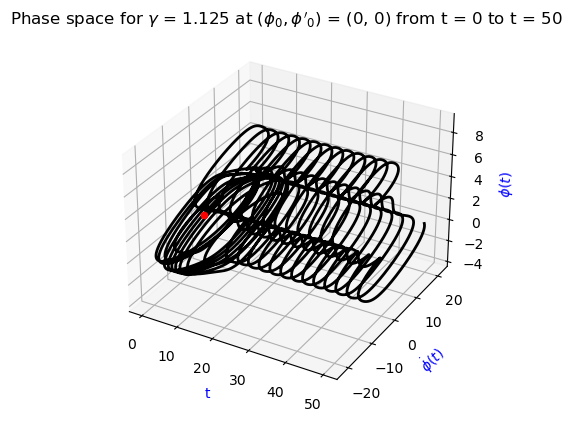

In [281]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si
from matplotlib.pyplot import figure, plot, show, xlabel, ylabel, scatter, title
from numpy import array, arange, linspace, sqrt, meshgrid, reshape, empty, sin, cos, pi, exp
from numpy import log10 as log
from numpy import log as ln
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

t0, tf = 0, 50 #initial and final times
dt = 0.0001 #times step for the times array
times = np.arange(t0, tf+dt, dt)

#Other parameters
om = 2*pi
om_0 = 1.5*om
b = om_0/4

#Value of gamma. A parameter that influences how chaotic the system is
g = 1.125

#Initial conditions for y
ic = np.array([0, 0])

#Rewriting the ODE as a system of linear equations
def flux_ode(t, y, om, om_0, b, g):
    return np.array(
        [
            y[1], 
            g*(om_0**2)*np.cos(om*t) - 2*b*y[1] - (om_0**2)*np.sin(y[0])
            ]
        )

method = 'DOP853'

#Solves the DE at the desired initial condition
y1 = si.solve_ivp(
    flux_ode,
    [t0, tf], ic, t_eval=times, 
    args=[om, om_0, b, g],
    method=method, 
    vectorized=True, 
    rtol=1e-10,
    atol=1e-10
    ).y


def plot3d():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    plot(times, y1[1], y1[0], lw=2, c="k")
    ax.scatter(np.array(ic[0]), np.array(ic[1]), c="r")
    ax.set_title(f"Phase space for $\gamma$ = {g} at $(\phi_0, \phi'_0)$ = {(round(ic[0],2), round(ic[1],2))} from t = {round(t0,2)} to t = {round(tf,2)}")
    ax.grid()
    ax.set_xlabel("t", c = 'b')
    ax.set_zlabel("$\phi(t)$", c = 'b')
    ax.set_ylabel("$\dot{\phi}(t)$", c = 'b')
    return(show())

def plot2d():
    plot(y1[0], y1[1], lw=2, c="k")
    scatter(np.array(ic[0]), np.array(ic[1]), c="r")
    title(f"Phase space for $\gamma$ = {g} at $(\phi_0, \phi'_0)$ = {(round(ic[0],2), round(ic[1],2))} from t = {round(t0,2)} to t = {round(tf,2)}")
    xlabel("$\phi(t)$", c = 'b')
    ylabel("$\dot{\phi}(t)$", c = 'b')
    return(show())

    
    
#Plot the phase space diagram for the solution

plot3d()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


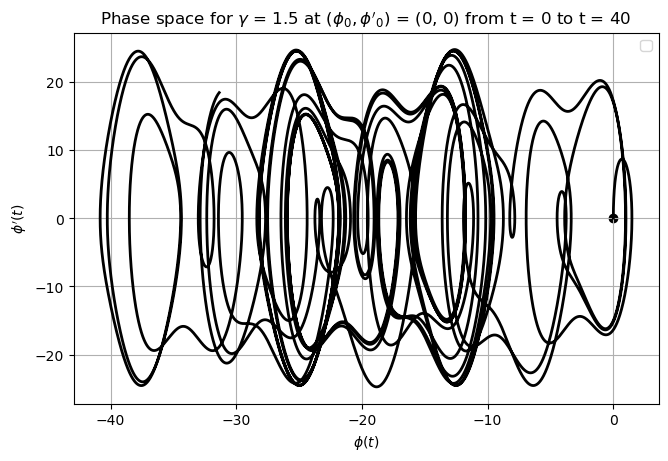

In [270]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si

t0, tf = 0, 40 #initial and final times
dt = 0.0001 #times step for the times array
times = np.arange(t0, tf+dt, dt)

#Other parameters
om = 2*np.pi
om_0 = 1.5*om
b = om_0/4

#Value of gamma. A parameter that influences how chaotic the system is
g = 1.5

#Initial conditions for y
ic = np.array([0,0])

#Rewriting the ODE as a system of linear equations
def flux_ode(t, y, om, om_0, b, g):
    return np.array(
        [
            y[1], 
            g*(om_0**2)*np.cos(om*t) - 2*b*y[1] - (om_0**2)*np.sin(y[0])
            ]
        )

method = 'DOP853'

#Solves the DE at the desired initial condition
y1 = si.solve_ivp(
    flux_ode,
    [t0, tf], ic, t_eval=times, 
    args=[om, om_0, b, g],
    method=method, 
    vectorized=True, 
    rtol=1e-10,
    atol=1e-10
    ).y

fig1, ax = plt.subplots(1)

#Plot the phase space diagram for the solution
ax.plot(y1[0], y1[1], lw=2, c="k")
ax.scatter(np.array(ic[0]), np.array(ic[1]), c="k")
ax.legend()
ax.set_title(f"Phase space for $\gamma$ = {g} at $(\phi_0, \phi'_0)$ = {(ic[0], ic[1])} from t = {t0} to t = {tf}")
ax.grid()
ax.set_xlabel("$\phi(t)$")
ax.set_ylabel("$\phi'(t)$")
fig1.subplots_adjust(left=0.053, bottom=0.137, top=0.91, right=0.967)


plt.show()

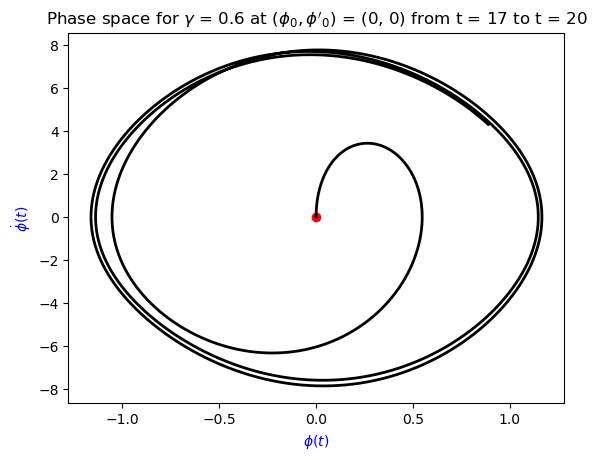

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si
from matplotlib.pyplot import figure, plot, show, xlabel, ylabel, scatter, title
from numpy import array, arange, linspace, sqrt, meshgrid, reshape, empty, sin, cos, pi, exp
from numpy import log10 as log
from numpy import log as ln
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

t0, tf = 17, 20 #initial and final times
dt = 0.0001 #times step for the times array
times = np.arange(t0, tf+dt, dt)

#Other parameters
om = 2*pi
om_0 = 1.5*om
b = om_0/4

#Value of gamma. A parameter that influences how chaotic the system is
g = .6

#Initial conditions for y
ic = np.array([0, 0])

#Rewriting the ODE as a system of linear equations
def flux_ode(t, y, om, om_0, b, g):
    return np.array(
        [
            y[1], 
            g*(om_0**2)*np.cos(om*t) - 2*b*y[1] - (om_0**2)*np.sin(y[0])
            ]
        )

method = 'DOP853'

#Solves the DE at the desired initial condition
y1 = si.solve_ivp(
    flux_ode,
    [t0, tf], ic, t_eval=times, 
    args=[om, om_0, b, g],
    method=method, 
    vectorized=True, 
    rtol=1e-10,
    atol=1e-10
    ).y


def plot3d():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    plot(times, y1[1], y1[0], lw=2, c="k")
    ax.scatter(np.array(ic[0]), np.array(ic[1]), c="r")
    ax.set_title(f"Phase space for $\gamma$ = {g} at $(\phi_0, \phi'_0)$ = {(round(ic[0],2), round(ic[1],2))} from t = {round(t0,2)} to t = {round(tf,2)}")
    ax.grid()
    ax.set_xlabel("t", c = 'b')
    ax.set_zlabel("$\phi(t)$", c = 'b')
    ax.set_ylabel("$\dot{\phi}(t)$", c = 'b')
    return(show())

def plot2d():
    plot(y1[0], y1[1], lw=2, c="k")
    scatter(np.array(ic[0]), np.array(ic[1]), c="r")
    title(f"Phase space for $\gamma$ = {g} at $(\phi_0, \phi'_0)$ = {(round(ic[0],2), round(ic[1],2))} from t = {round(t0,2)} to t = {round(tf,2)}")
    xlabel("$\phi(t)$", c = 'b')
    ylabel("$\dot{\phi}(t)$", c = 'b')
    return(show())

    
    
#Plot the phase space diagram for the solution

plot2d()

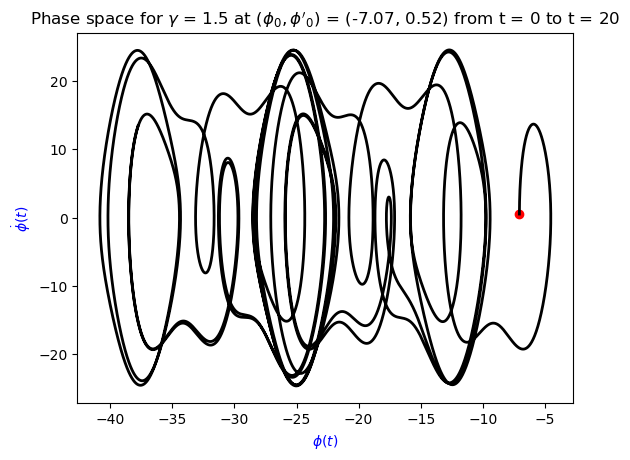

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si
from matplotlib.pyplot import figure, plot, show, xlabel, ylabel, scatter, title
from numpy import array, arange, linspace, sqrt, meshgrid, reshape, empty, sin, cos, pi, exp
from numpy import log10 as log
from numpy import log as ln
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

t0, tf = 0, 20 #initial and final times
dt = 0.0001 #times step for the times array
times = np.arange(t0, tf+dt, dt)

#Other parameters
om = 2*pi
om_0 = 1.5*om
b = om_0/4

#Value of gamma. A parameter that influences how chaotic the system is
g = 1.5

#Initial conditions for y
ic = np.array([-(9*pi/4), (pi/6)])

#Rewriting the ODE as a system of linear equations
def flux_ode(t, y, om, om_0, b, g):
    return np.array(
        [
            y[1], 
            g*(om_0**2)*np.cos(om*t) - 2*b*y[1] - (om_0**2)*np.sin(y[0])
            ]
        )

method = 'DOP853'

#Solves the DE at the desired initial condition
y1 = si.solve_ivp(
    flux_ode,
    [t0, tf], ic, t_eval=times, 
    args=[om, om_0, b, g],
    method=method, 
    vectorized=True, 
    rtol=1e-10,
    atol=1e-10
    ).y


def plot3d():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    plot(y1[1], y1[0], times, lw=2, c="k")
    ax.scatter(np.array(ic[0]), np.array(ic[1]), c="r")
    ax.set_title(f"Phase space for $\gamma$ = {g} at $(\phi_0, \phi'_0)$ = {(round(ic[0],2), round(ic[1],2))} from t = {round(t0,2)} to t = {round(tf,2)}")
    ax.grid()
    ax.set_zlabel("t", c = 'b')
    ax.set_ylabel("$\phi(t)$", c = 'b')
    ax.set_xlabel("$\dot{\phi}(t)$", c = 'b')
    return(show())

def plot2d():
    plot(y1[0], y1[1], lw=2, c="k")
    scatter(np.array(ic[0]), np.array(ic[1]), c="r")
    title(f"Phase space for $\gamma$ = {g} at $(\phi_0, \phi'_0)$ = {(round(ic[0],2), round(ic[1],2))} from t = {round(t0,2)} to t = {round(tf,2)}")
    xlabel("$\phi(t)$", c = 'b')
    ylabel("$\dot{\phi}(t)$", c = 'b')
    return(show())
    
    
#Plot the phase space diagram for the solution

plot2d()